In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#path ='/home/nrw/Documents/projects_Spring2018/howe299r/Experiments/26Mar2018/data/deltas/'
path ='/home/nrw/Documents/projects_Spring2018/howe299r/Experiments/26Mar2018/data/'
csv = 'allPositions_Torque.csv'
df = pd.read_csv(path+csv,sep='\t')
df .dropna(how="all", inplace=True) 

print(list(df))
#print(list(imuf))
yaw, pitch, roll = df["yaw"], df["pitch"], df["roll"]
yaw, pitch, roll = yaw*57.29578, pitch*57.29578, roll*57.29578 #convert to degrees
pitchViz, rollViz, yawViz = yaw, pitch, roll 
#print(np.sign(yaw), np.sign(pitch), np.sign(roll))

xIMU, yIMU, zIMU = df["xIMU"], df["yIMU"], df["zIMU"]
rollIMU, pitchIMU, yawIMU = xIMU, yIMU, zIMU

forceDistX, forceDistY, forceDistZ = df["dist x"], df["dist y"], df["dist z"]


# torques will are a (force*dist), dims(3).N(datapoints)
# e.g. torqueX = forces* forceDistX
forces = df["force"]
print(len(forces))
print(len(forces*forceDistX))

torques = np.array([forces*forceDistX,forces*forceDistY, forces*forceDistZ])
print(torques.shape)
thetaIMU = np.array([rollIMU, pitchIMU, yawIMU])
thetaViz = np.array([rollViz, pitchViz, yawViz])
print(thetaViz.shape)

# k is stiffness
kEstViz = np.linalg.lstsq(torques.T, thetaViz.T)[0]
kEstIMU = np.linalg.lstsq(torques.T, thetaIMU.T)[0] #we expect a 3x3 matrix for k
print(kEstIMU.shape)
torqueEstIMU = np.dot(kEstIMU, thetaIMU)
torqueEstViz = np.dot(kEstIMU, thetaViz)
print(torqueEstIMU.shape)

#kEstIMU= np.divide(torques, thetaIMU)

['yaw', 'pitch', 'roll', 'force', 'dist x', 'dist y', 'dist z', 'Distance (#)', 'xIMU', 'yIMU', 'zIMU']
42
42
(3, 42)
(3, 42)
(3, 3)
(3, 42)


/home/nrw/Documents/projects_Spring2018/howe299r/Experiments/venv/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
/home/nrw/Documents/projects_Spring2018/howe299r/Experiments/venv/lib/python3.6/site-packages/ipykernel_launcher.py:38: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [191]:
np.set_printoptions(suppress=True)
#np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print('Stiffness Estimated by IMU: \n', kEstIMU, '\n')
print('Stiffness Estimated by AprilTag (camera): \n', kEstViz, '\n')
print('Difference: \n', kEstViz-kEstIMU)

Stiffness Estimated by IMU: 
 [[-0.0005671  -0.01646011  0.00047227]
 [-0.00017718  0.00042152 -0.00181939]
 [ 0.          0.          0.        ]] 

Stiffness Estimated by AprilTag (camera): 
 [[-0.00149241 -0.01804385 -0.00102431]
 [-0.00097688  0.00003939  0.00208215]
 [ 0.          0.          0.        ]] 

Difference: 
 [[-0.00092531 -0.00158374 -0.00149658]
 [-0.0007997  -0.00038213  0.00390154]
 [ 0.          0.          0.        ]]


In [196]:
residualsIMU = torqueEstIMU - torques
residualsViz = torqueEstViz - torques
#print(residualsIMU.shape)

print('First dimension = x/y/z, second dimension = for each sample\n')
print('IMU: A subset of samples, and their residuals:\n',np.array([row[0:5] for row in residualsIMU]), '\n')
print('Viz: A subset of samples, and their residuals:\n',np.array([row[0:5] for row in residualsViz]))

First dimension = x/y/z, second dimension = for each sample

IMU: A subset of samples, and their residuals:
 [[ -45.99482077  -91.97630315 -137.95984305 -183.94646328 -229.93832178]
 [ -30.00012065  -60.00059487  -90.00101639 -120.00123409 -150.00110372]
 [   0.            0.            0.            0.            0.        ]] 

Viz: A subset of samples, and their residuals:
 [[ -45.98733372  -91.97457953 -137.95727714 -183.94663494 -229.92635635]
 [ -29.99944436  -60.00076235  -90.00084825 -120.00166499 -150.00296153]
 [   0.            0.            0.            0.            0.        ]]


42 (3, 42)
(3, 42)
Since torques were taken in increasing order, the plot for "increasing order" would be the same


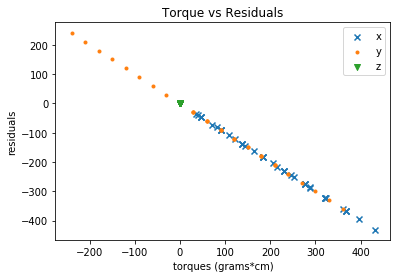

In [174]:
print(len(forces), residualsIMU.shape)
print(torques.shape)
#print(torques)
plt.scatter(torques[0], residualsIMU[0], label='x', marker='x')
plt.scatter(torques[1], residualsIMU[1], label='y', marker='.')
plt.scatter(torques[2], residualsIMU[2], label='z', marker='v')
#plt.scatter(torques, residualsViz, marker='x', label='aprilTags') #????
plt.title('Torque vs Residuals')
print('Since torques were taken in increasing order, the plot for "increasing order" would be the same')
plt.ylabel('residuals')
plt.xlabel('torques (grams*cm)')
plt.legend()
plt.show()

42 (3, 42)
(3, 42)


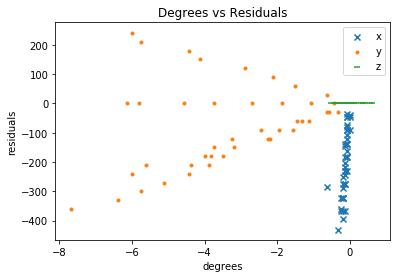

In [199]:
print(len(forces), residualsIMU.shape)
print(torques.shape)
#print(torques)
plt.scatter(rollIMU, residualsIMU[0], label='x', marker='x')
plt.scatter(pitchIMU, residualsIMU[1], label='y', marker='.')
plt.scatter(yawIMU, residualsIMU[2], label='z', marker='_')
#plt.scatter(torques, residualsViz, marker='x', label='aprilTags') #????
plt.title('Degrees vs Residuals')
plt.ylabel('residuals')
plt.xlabel('degrees')
plt.legend()
plt.show()

42 (3, 42)
(3, 42)


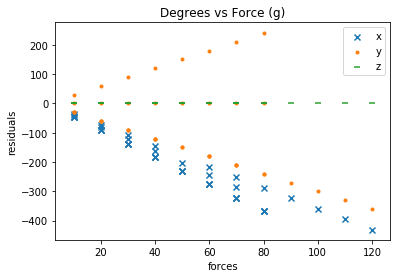

In [198]:
print(len(forces), residualsIMU.shape)
print(torques.shape)
#print(torques)
plt.scatter(forces, residualsIMU[0], label='x', marker='x')
plt.scatter(forces, residualsIMU[1], label='y', marker='.')
plt.scatter(forces, residualsIMU[2], label='z', marker='_')
#plt.scatter(torques, residualsViz, marker='x', label='aprilTags') #????
plt.title('Degrees vs Force (g)')
plt.ylabel('residuals')
plt.xlabel('forces')
plt.legend()
plt.show()